<a href="https://colab.research.google.com/github/git-karan/Spam_Message_Classification/blob/master/SpamClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Spam Classification/SPAM_Data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Doing some basis EDA on the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

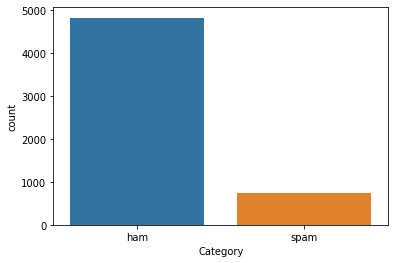

In [6]:
sns.countplot(x='Category',data=data)

# Text Pre-Processing



*   Converting Category('ham', 'spam') to (0,1)




In [7]:
data['label']= data.Category.map({'ham':0,'spam':1})

In [8]:
data.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0




*   Preprocessing 'Message'
  * Converting everything to Lower Case
  * Removing everything except Alphabets
  * Stopwords removal
  * Stemming














In [9]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
stopw=stopwords.words('english')

In [11]:
sbs= SnowballStemmer('english')
message_clean=[]
for i in range(data.shape[0]):
  mess= re.sub(pattern='[^A-Za-z]',repl=' ',string=data.Message.iloc[i])
  mess=mess.lower()
  mess= [word for word in mess.split() if word not in set(stopw)]
  mess=[ sbs.stem(word) for word in mess ]
  mess=' '.join(mess)
  message_clean.append(mess)

In [12]:
message_clean[0:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [13]:
data.drop(['Message','Category'],axis=1,inplace=True)

In [14]:
data['Message']= pd.Series(message_clean)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   Message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [16]:
data.head()

,label,Message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkts st ...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


## Splitting data into Training and Test

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(data.Message,data.label,test_size=0.25,random_state=34)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4179,) (4179,)
(1393,) (1393,)


##Vectorizing Message column

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=2500)
cv.fit(X_train)
Message_train_ohe= cv.transform(X_train)
Message_test_ohe= cv.transform(X_test)

## Applying ML Models

In [31]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
param={'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}
clf= RandomizedSearchCV(model,param,cv=4,n_iter=6,random_state=25)
search=clf.fit(Message_train_ohe,y_train)

In [33]:
results= pd.DataFrame(search.cv_results_)

In [34]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002815,0.000881,0.000606,0.000122,0.1,{'alpha': 0.1},0.984689,0.977990,0.982775,0.982759,0.982053,0.002473,1
1,0.002199,0.000020,0.000518,0.000024,0.0001,{'alpha': 0.0001},0.981818,0.975120,0.976077,0.977969,0.977746,0.002565,4
2,0.002197,0.000038,0.000505,0.000011,0.001,{'alpha': 0.001},0.982775,0.975120,0.979904,0.980843,0.979660,0.002819,3
3,0.002204,0.000045,0.000489,0.000007,10,{'alpha': 10},0.977033,0.982775,0.977033,0.971264,0.977027,0.004070,5
4,0.002158,0.000036,0.000477,0.000009,100,{'alpha': 100},0.916746,0.920574,0.911962,0.920498,0.917445,0.003524,6
5,0.003301,0.001704,0.000588,0.000124,0.01,{'alpha': 0.01},0.983732,0.976077,0.982775,0.980843,0.980857,0.002949,2


best_alpha=0.1

In [36]:
# training model on the best parameter
classifier= MultinomialNB(alpha=0.1)
classifier.fit(Message_train_ohe,y_train)


MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [44]:
def predict_spam(msg):
  msg= re.sub(pattern='[^a-zA-Z]',repl=' ',string=msg)
  msg=msg.lower()
  msg= [word for word in msg.split() if word not in set(stopw)]
  msg= [sbs.stem(word) for word in msg]
  msg=' '.join(msg)
  msg= cv.transform([msg]).toarray()
  return classifier.predict(msg)
  

In [45]:
message='you have won a lottery worth $1000.Please share your details to claim prizes'
res= predict_spam(message)
if res==1:
  print('Message is Spam')
else:
  print('Not a Spam message')

Message is Spam


In [46]:
message='You have been assigned the work.Please share your progress till tomorrow eod'
res= predict_spam(message)
if res==1:
  print('Message is Spam')
else:
  print('Not a Spam message')

Not a Spam message
